# 現場の水理学のヒント：自然河道断面の平均流速公式

自然河道断面の計算は、教科書の水理学から実務の水理学へ展開するときの第一歩のようなものです。
簡単なんですが知らないとちょっと面倒なので解説しておきます。

基本なのにしっかりと記載されている書籍があまりないです。
[水理公式集](https://www.amazon.co.jp/%E6%B0%B4%E7%90%86%E5%85%AC%E5%BC%8F%E9%9B%86%E3%80%882018%E5%B9%B4%E7%89%88%E3%80%89-%E5%9C%9F%E6%9C%A8%E5%AD%A6%E4%BC%9A%E6%B0%B4%E5%B7%A5%E5%AD%A6%E5%A7%94%E5%93%A1%E4%BC%9A%E6%B0%B4%E7%90%86%E5%85%AC%E5%BC%8F%E9%9B%86%E7%B7%A8%E9%9B%86%E5%B0%8F%E5%A7%94%E5%93%A1%E4%BC%9A/dp/4810608352)
に難解に記されているので読んでも良いと思いますが。。。

## 基本



自然河道断面とは下図のような実河川をモデル化したような断面形を示す。一般断面とも呼ばれる。

![x](sect1+tex.svg)

水位$H$と流量$Q$の関係は、一般に連続式とマニング則で計算する。

$$
\begin{align}
Q &= AV \\
V &= \frac{1}{n}i_e^{1/2}R^{2/3}
\end{align}
$$

自然河道断面の河積$A$,潤辺$S$,径深$R$は次式で計算する。

$$
\begin{align}
S_i &= \sqrt{(L_{i+1}-L_i)^2 + (Z_{i+1}-Z_i)^2} \\
A_i &= \left[H-0.5(Z_{i+1}+Z_i)\right](L_{i+1}-L_i) \\
S &= \sum_{i=1}^{imax-1} \!\! S_i \\
A &= \sum_{i=1}^{imax-1} \!\! A_i \\
R &= \dfrac{ A }{ S }\\
\end{align}
$$

これらを基に計算を進める。

## 横断面内で単一の流速を仮定する場合：径深分割法

径深分割法と呼ばれる以下の方法により、マニングの粗度係数$n$を計算して平均流速を計算する。

$$
\begin{align}
n' &= \left( \dfrac{  \displaystyle \sum_{i=1}^{imax-1} S_i n_i^{3/2}}{ \displaystyle \sum_{i=1}^{imax-1} S_i } \right)^{2/3} \\ 
V &= \frac{1}{n'}i_e^{1/2}R^{2/3} 
\end{align}
$$

## 横断面内で複数の流速を仮定する場合：分割断面法（通水能法とも呼ばれる）

![x](sect2+tex.svg)

例えば、上図のような複断面河道の場合は低水路と高水敷で流速が大きく異なるため、以下のように領域（分割断面:subsection）ごとの平均流速を求める。この方法は分割断面法と呼ばれる。

$$
\begin{align}
Q &= \sum^{nmax}_{n=1} A_n V_n   \\
V_n &= \frac{1}{n_n}i_e^{1/2}R_n^{2/3} \\
Q &= \left(\sum^{nmax}_{n=1}  \dfrac{{A_n}^{5/3}}{n'_n S_n^{2/3}} \right) i_e^{1/2}  
\end{align}
$$

上式のカッコ内は通水能$K$(下式)と定義されるため、通水能法とも呼ばれる。

$$
\begin{align}
K &= \dfrac{A^{5/3}}{n S^{2/3}} 
\end{align}
$$

各分割断面の$A_n,S_n,R_n,n'_n$は径深分割法で計算する。

以上を用いることにより複雑な河川横断形でも断面内の平均流速を計算することができる。

# まとめ

 - 思ったよりすっきり書けた気がします。ニーズがあれば出典も含めてもう少し詳しく書きます。
 - プログラミングする方はわかると思いますが、オブジェクト指向に最適です。練習用にぜひコーディングしてみて下さい。

# さらに高みに

それぞれが重い内容なのでニーズがあれば記事を書きます。

 - 不等流や不定流計算に用いる場合は、運動量補正係数又はエネルギー補正係数も上式を用いて計算する。
 - 実務ではもう少し複雑な方法を用いています。たかだか流速を計算するのに逆行列の計算が必要になります。興味のある方は[河道計画検討の手引き](http://www.jice.or.jp/cms/kokudo/pdf/tech/material/kadoukeikaku.pdf#page=84)に難解に記載されています。
 - 径深分割法の他に勾配分割法というものもありますが現在はあまり使われておりません。
 - 複断面河道で分割断面法を用いる重要な理由の一つに水位-流量の関係を単調増加関数として取り扱うというものがあります。この話が書いてある文献等は多分ないと思います。初心者には難しいですが[井田(1960):広巾員開水路の定常流](https://www.jstage.jst.go.jp/article/jscej1949/1960/69/1960_69_b1/_pdf/-char/en)くらいですかね。

# グラフ

In [19]:
import holoviews as hv
import numpy as np
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Scatter.I :Scatter   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
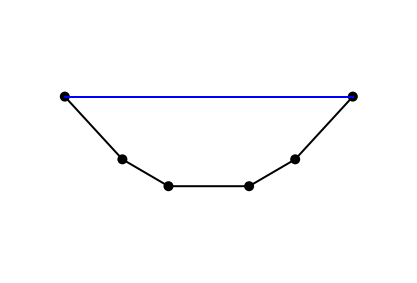

In [78]:
L = [1, 2, 2.8, 4.2, 5, 6]
Z = [2,1.3,1,1,1.3,2]
H = hv.Curve(([1,6],[2,2])).options(c='b')
g = hv.Curve((L,Z)).options(c='k') * hv.Scatter((L,Z)).options(c='k',s=100) * H
g = g.redim.range(x=(0,7),y=(0,3)).options(fig_size=200,aspect=1.5, xaxis=False, yaxis=False )
g

In [79]:
hv.save(g,'sect1.svg')

:Overlay
   .Curve.I   :Curve   [x]   (y)
   .Scatter.I :Scatter   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
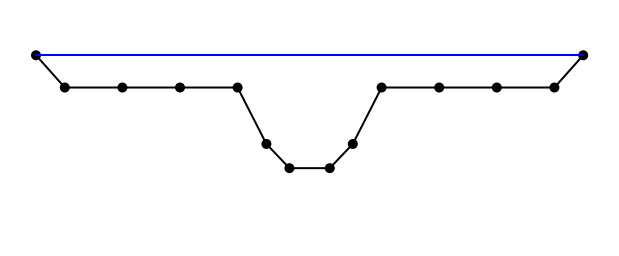

In [104]:
L = [-6,-5,-3,-1]+[1, 2, 2.8, 4.2, 5, 6] + [8,10,12,13]
Z = [2.4,2,2,2]+[2,1.3,1,1,1.3,2] + [2,2,2,2.4]
H = hv.Curve(([-6,13],[2.4,2.4])).options(c='b')
g = hv.Curve((L,Z)).options(c='k') * hv.Scatter((L,Z)).options(c='k',s=100)* H
g = g.redim.range(x=(-7,14),y=(0,3)).options(fig_size=300,aspect=2.5, xaxis=False, yaxis=False )
g

In [105]:
hv.save(g,'sect2.svg')